## Imports

In [1]:
# import packages
import random
import noise
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import math


## Parameters

In [2]:
# parameters
numberOfTags = 5

# grid size
PLOT_X = 50
PLOT_Y = 50
PLOT_Z = 50

# layer parameters
z_shift = .1
layerScale = 15
modulationScale = 35.0
modulationWeight = .9


seed = random.randint(1, 100)
PLOT_REPEAT = 4096

In [3]:
# graph params
GRAPH_ALPHA=1

colors = []
for i in range(numberOfTags):
    val = i/numberOfTags
    colors.append((val, val, val, GRAPH_ALPHA))
colors[numberOfTags-1] = (1.0,1.0,1.0, 0.0)

CUSTOM_CMAP = LinearSegmentedColormap.from_list('custom_cmap', colors)

## GridGen

In [4]:
# Create an empty 3D array
data = np.zeros((PLOT_X, PLOT_Y, PLOT_Z))

# some statistics
minNum = 5555
maxNum = -5555
bz = 0
uz = 0
quantisedVals={-1}
quantisedVals.remove(-1)

# Generate 3D Perlin noise
for z in range(PLOT_X):
    for x in range(PLOT_Z):
        for y in range(PLOT_Y):
            # Modulated Layers
            data[z][y][x] = x / PLOT_Z
            data[z][y][x] += noise.pnoise3(
                x/modulationScale,
                y/modulationScale,
                z/modulationScale,
                octaves=6,
                persistence=0.5,
                lacunarity=2.0,
                repeatx=PLOT_REPEAT,
                repeaty=PLOT_REPEAT,
                repeatz=PLOT_REPEAT,
                base=seed
            ) * modulationWeight

            #collect stats
            if data[z][y][x] > 0:
                uz += 1
            else:
                bz += 1

            data[z][y][x] = ((data[z][y][x] + z_shift) + 1) / 2
            data[z][y][x] = min(max(data[z][y][x], .0001), .9999)


            if data[z][y][x] < minNum:
                minNum = data[z][y][x]
            if data[z][y][x] > maxNum:
                maxNum = data[z][y][x]
            


#saturate and quantize 
for z in range(PLOT_X):
    for x in range(PLOT_Z):
        for y in range(PLOT_Y):
            data[z][y][x] = (data[z][y][x] - minNum) / (maxNum - minNum)
            # quantize and add to set 
            data[z][y][x] = math.floor(data[z][y][x] * (numberOfTags - 1))
            quantisedVals.add(data[z][y][x])
            data[z][y][x] /= numberOfTags


print(f"{minNum} : {maxNum}   - share below 0 {bz}    share above 0 {uz}")
print(f"tags: {numberOfTags}, setSize: {len(quantisedVals)}")
print(quantisedVals)



0.3945401176810265 : 0.9999   - share below 0 5470    share above 0 119530
tags: 5, setSize: 5
{0.0, 1.0, 2.0, 3.0, 4.0}


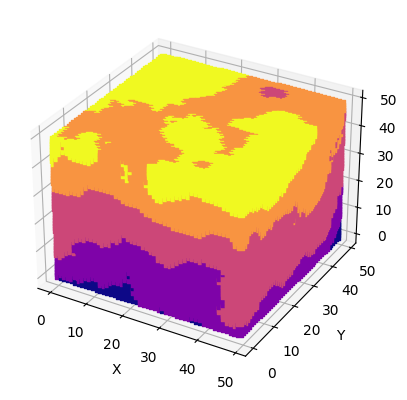

In [5]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Generate meshgrid for x, y, and z coordinates
x_coords = np.linspace(0, PLOT_X - 1, PLOT_X)
y_coords = np.linspace(0, PLOT_Y - 1, PLOT_Y)
z_coords = np.linspace(0, PLOT_Z - 1, PLOT_Z)
x_mesh, y_mesh, z_mesh = np.meshgrid(
    x_coords,
    y_coords,
    z_coords
)

# Display the 3D noise as a scatter plot
ax.scatter(x_mesh, y_mesh, z_mesh, c=data.flatten(), cmap='plasma', marker='s', alpha=GRAPH_ALPHA)
plt.show()